In [1]:
%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [2]:
mpg_df = pd.read_csv('auto-mpg (1).csv')

In [4]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
mpg_df[mpg_df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [7]:
mpg_df=mpg_df.replace('?',np.nan)

In [8]:
mpg_df=mpg_df.drop('car name',axis=1)

In [9]:
mpg_df=mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [13]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


C:\Users\admin\AppData\Local\Temp\ipykernel_11732\4259081216.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
C:\Users\admin\AppData\Local\Temp\ipykernel_11732\4259081216.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
C:\Users\admin\AppData\Local\Temp\ipykernel_11732\42590812

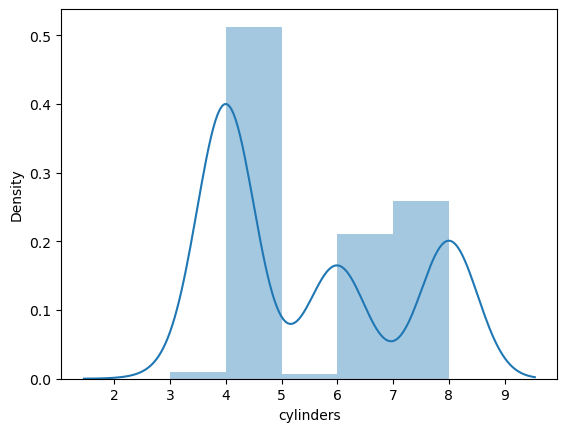

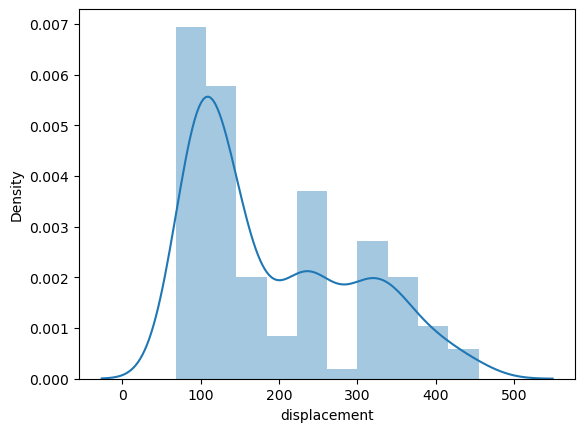

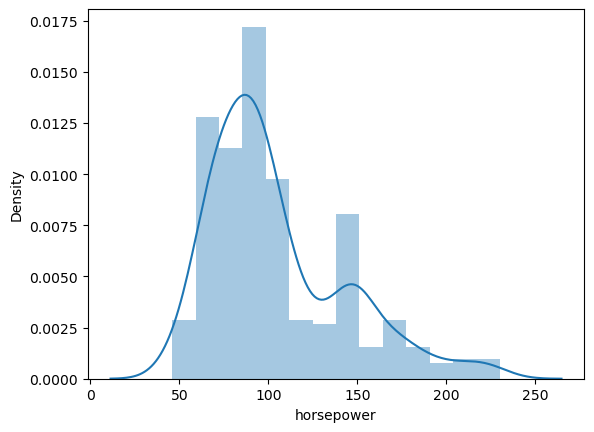

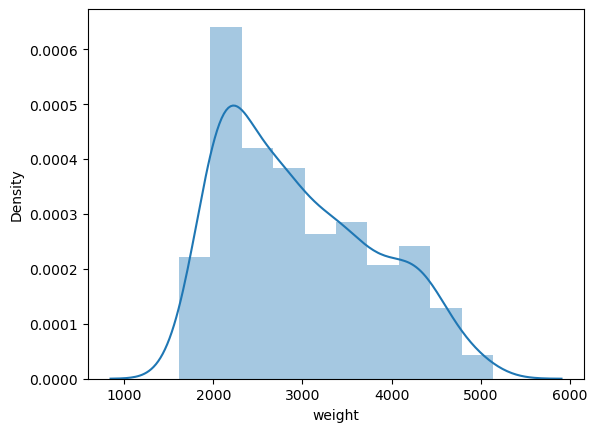

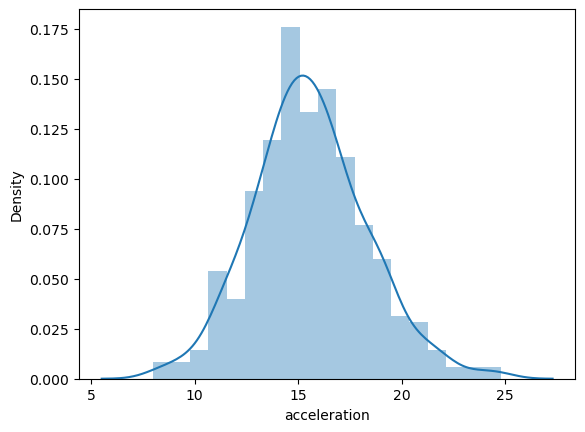

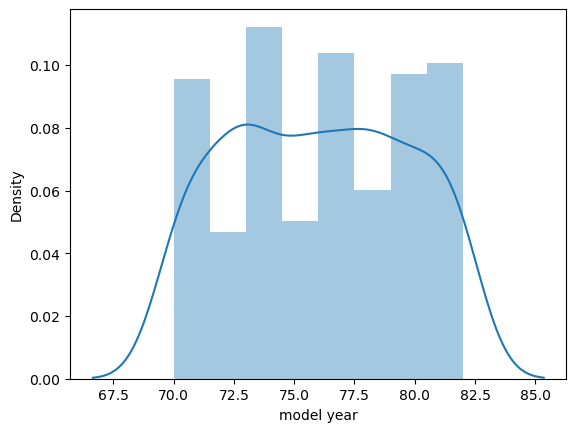

In [16]:
a=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
for i in a:
    plt.figure()
    sns.distplot(X[i])


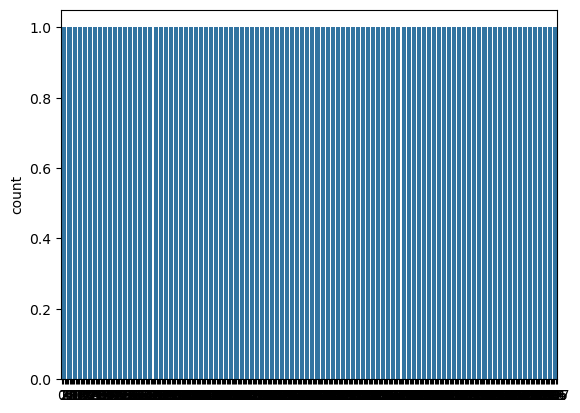

In [17]:
a=['origin']
for i in a:
    plt.figure()
    sns.countplot(X[i])

C:\Users\admin\AppData\Local\Temp\ipykernel_11732\683869929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

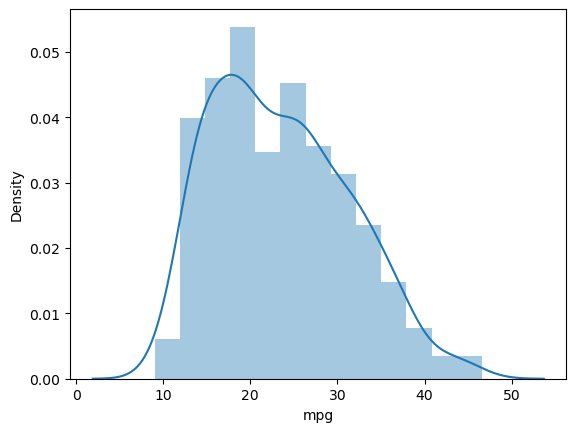

In [18]:
sns.distplot(y['mpg'])

In [19]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [21]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.08561436895562727
The coefficient for displacement is 0.30441822535930224
The coefficient for horsepower is -0.09718466302484148
The coefficient for weight is -0.7628632829136762
The coefficient for acceleration is 0.021591275172924692
The coefficient for model year is 0.37494080741187147
The coefficient for origin is 0.12302637024556869


In [23]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.012833128293992926


In [24]:
ridge = Ridge(alpha=.3) #coefficients are prevented to become too big by this alpha value
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

Ridge model coefficients for cylinders is -0.08073001909555812:
Ridge model coefficients for displacement is 0.2882220741723119:
Ridge model coefficients for horsepower is -0.09985675156606097:
Ridge model coefficients for weight is -0.7510550916024473:
Ridge model coefficients for acceleration is 0.019127698314832502:
Ridge model coefficients for model year is 0.3737831248958427:
Ridge model coefficients for origin is 0.12212717285800233:


In [25]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for cylinders is -0.0:
Lasso model coefficients for displacement is -0.0:
Lasso model coefficients for horsepower is -0.013280002937314548:
Lasso model coefficients for weight is -0.6205207866794482:
Lasso model coefficients for acceleration is 0.0:
Lasso model coefficients for model year is 0.2919873292491348:
Lasso model coefficients for origin is 0.021567653979880714:


In [26]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8081802739111359
0.8472274567567306


In [27]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8081651504849107
0.8475401122140553


In [28]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7853770917055521
0.8277658025171161


In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [31]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(278, 29)

In [32]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 2.76250572e+13  7.27451322e-01 -1.39200215e+00 -1.77677191e+00
 -4.68903156e+00 -3.89906258e-01  2.90680427e+00  6.20842151e-01
  1.69727016e-01 -1.78810611e-01  1.40501753e+00  7.12285551e-01
 -1.05870574e+00  2.99702020e-01  1.48224971e-01  8.61984176e-01
 -5.24657821e-01  3.00085759e+00  2.04143370e+00 -1.53573088e-01
 -9.54261900e-01 -1.51137932e+00  1.60778236e+00  5.77405395e-01
 -5.32841470e-01 -1.89857628e+00  5.00806874e-01  1.50533135e+00
  1.10253666e+00]


In [33]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          0.64813084 -0.36554878 -2.46919357 -4.70667241 -0.63510083
   2.8499319   0.96173248 -0.49248204 -0.57492325  1.37951065  1.0927984
  -1.42036657  0.89110432 -0.16927823  1.35119104 -1.1349459   3.21038276
   1.16514278  0.22836119 -0.89663938 -1.35284633  0.79573939  0.58576253
  -0.61776911 -0.88637153  0.54014514  1.23036832  0.88256903]]


In [34]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8924614223751737
0.8615025469455593


In [35]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.2994648  -0.08787231 -2.43642026 -4.7023043  -0.41557099
  2.82883219  0.79630585 -0.63845609 -0.19106524  1.35870323  0.71048483
 -0.95232354  0.80157019 -0.          1.30713909 -0.22245995  2.23244448
  0.41856317  0.         -0.68238432 -1.20299711  0.33414503  0.06086321
 -0.38005578 -0.07856802  0.52335532  1.11608276  0.72523195]


In [36]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8910435407965047
0.8679233223131171
